# MEAT DATA ANALYSIS








### About Dataset

This dataset contains the summary of meat produced, consumed and imported as compiled by the Ministry of Food and Agriculture from 2014 to 2018. The __Meat-analysis.csv.__ data set also includes data on the population of persons within the country within the same time frame:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TYP |	The Type of meat|
|CON|   The amount of meat consumed in tonnes|
|Year|  The year for which the stated data is relevant|
|PRO|	The amount of meat produced in tonnes|
|IMP|	The amount of meat imported into the country in tonnes|
|NP|	The National population|


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [7]:
#Load data from local directory
df = pd.read_csv('Meat-analysis.csv')
df

,TYP,CON,Year,PRO,IMP,NP
0,Poultry meat,187162,2014,54809,108967,28196358
1,Pork,22123,2014,22932,4689,28196358
2,Beaf and Veal,40185,2014,22781,27263,28196358
3,Sheep meat and Goat meat,38822,2014,43080,3394,28196358
4,Poultry meat,205056,2015,57276,121861,28870939
5,Pork,24239,2015,24513,6972,28870939
6,Beaf and Veal,44027,2015,23841,32137,28870939
7,Sheep meat and Goat meat,42534,2015,45121,3715,28870939
8,Poultry meat,191119,2016,59108,96975,29554303
9,Pork,22591,2016,26107,8271,29554303



The dataframe above shows the consumption, production and import totals in the coutry for various types of meat each within the years 2014 to 2018.

For the purpose of our analysis, we'll simplify the data to showcase the the sum total of all meat consumption, production, imports and population for each corresponding year

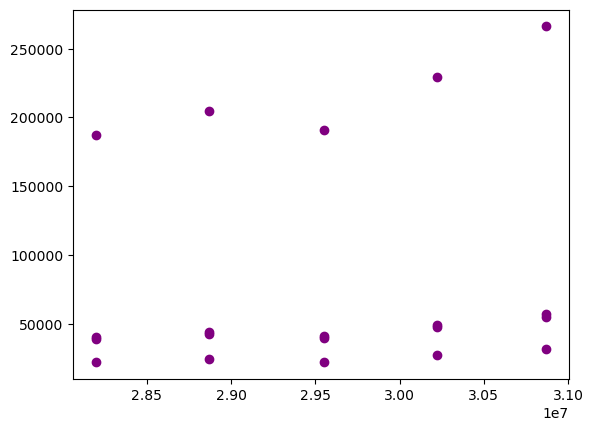

In [8]:
plt.scatter(df.NP, df.CON, color='purple')
plt.show()


As seen from the scatter plot above, the data is unevenly distributed, with some types of meat having much greater consumption rates than others. So I will create a summarized version of the data set to make the data much evenly distributed.

In [9]:
df_filtered = df.drop('TYP', axis=1)

# Create a new DataFrame to store the unique values and sums
df_sum = pd.DataFrame()

for year in df_filtered['Year'].unique():
    # Get the rows for the current year
    df_filtered_year = df_filtered[df_filtered['Year'] == year]
    consumption_sum = df_filtered_year['CON'].sum()
    production_sum = df_filtered_year['PRO'].sum()
    imports_sum = df_filtered_year['IMP'].sum()
    population = df_filtered_year['NP'].unique()
    df_temp = pd.DataFrame({'Year': year, 'Consumption': consumption_sum, 'Production': production_sum, 'Imports': imports_sum, 'Population': population})
    df_sum = df_sum.append(df_temp, ignore_index=True)
    
df_sum

,Year,Consumption,Production,Imports,Population
0,2014,288292,143602,144313,28196358
1,2015,315856,150751,164685,28870939
2,2016,294388,157810,136035,29554303
3,2017,353829,164125,189708,30222262
4,2018,410116,168290,241827,30870641


This new dataframe now contains a summarized version of the previous dataframe.

Now we'll plot some features against each other and make deductions from them.

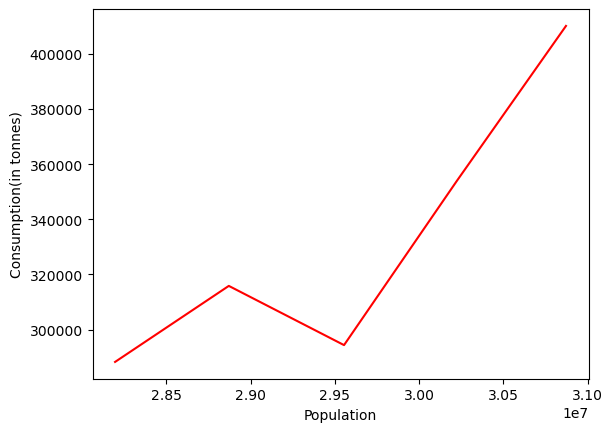

In [10]:
#Plotting meat consumption against the national population
plt.plot(df_sum.Population, df_sum.Consumption, color='red')
plt.xlabel('Population')
plt.ylabel('Consumption(in tonnes)')
plt.show()


__Generally, as the population of the country increases, the consumption of meat also rises__

Text(0, 0.5, 'Meat (in tonnes)')

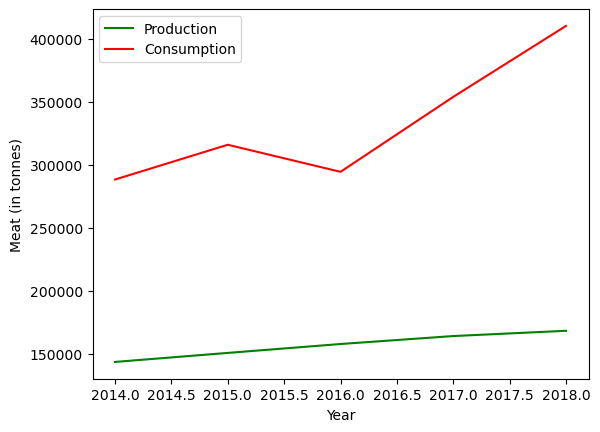

In [11]:
#Comparing Meat production and meat consumption
ax = df_sum.plot(kind='line', x ='Year', y='Production', color='green')
df_sum.plot(kind='line', x ='Year', y='Consumption', color='red', ax=ax)
plt.ylabel('Meat (in tonnes)')

AS seen from the graph above, the production of meat within the country seems to increase steadliy between 2014 to 2018, but the consumption of meat far superseds it. From 2016 to 2018 the production and consumption rates appear divergent, due to the consumption rate  far superseding the consumption rate.

This goes to show that the current rate of production of meat within the country is not sustainable to meet the rising demand.

Text(0, 0.5, 'Meat (in tonnes)')

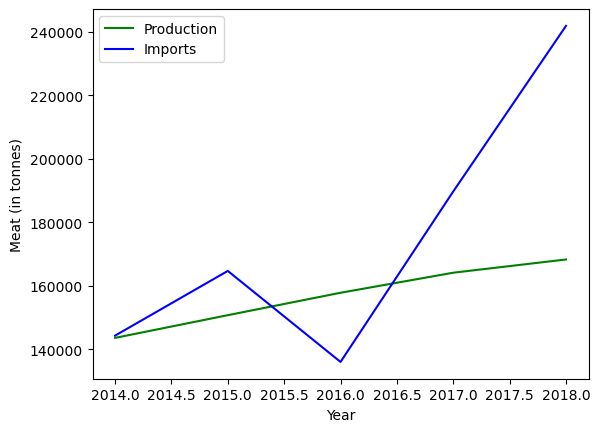

In [12]:
#Plotting Meat production against meat consumption
ax = df_sum.plot(kind='line', x ='Year', y='Production', color='green')
df_sum.plot(kind='line', x ='Year', y='Imports', color='blue', ax=ax)
plt.ylabel('Meat (in tonnes)') 


From the graph above it can be deduced that from 2016 to 2018, the rate of importation far superseds the rate of production, causing both graphs to appear divergent. This goes to show that the country is becoming more dependent on meat importation to meet it's rising demand.

Next we would create a linear regression model that would predict the amount of meat production within the country for subsequent years

### Creating the model

In [13]:
x = np.asarray(df_sum[['Year','Consumption','Imports','Population']])
y = np.asarray(df_sum[['Production']])

In [14]:
#Categorizing the data
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y, test_size=0.4, random_state=4)
print(x_train.shape, y_train.shape)

(3, 4) (3, 1)


array([[    2014,   288292,   144313, 28196358],
       [    2017,   353829,   189708, 30222262]], dtype=int64)

In [15]:
#Data preprocessing
from sklearn.preprocessing import PolynomialFeatures
x_train_norm = preprocessing.StandardScaler().fit_transform(x_train)
x_val_norm = preprocessing.StandardScaler().fit_transform(x_val)

x_poly = PolynomialFeatures(degree=3).fit_transform(x_train_norm)
x_val_poly = PolynomialFeatures(degree=3).fit_transform(x_val_norm)

In [16]:
#Fitting the model
from sklearn import linear_model
meat_model = linear_model.LinearRegression().fit(x_poly,y_train)

In [21]:
#Data Evaluation
from sklearn.metrics import r2_score
y_predict = meat_model.predict(x_val_poly)
y_predict

#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % meat_model.score(x_val_poly, y_predict))
print('R2-score: %.2f' %r2_score(y_val, y_predict))

Variance score: 1.00
R2-score: 0.67


This model would enable us predict future Production and Consumption rates